# Part 1: Clustering the Online Retail Data

In [1]:
### IMPORTS ###
#Clustering
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# checking the shape of the data
df.shape

(12330, 18)

In [4]:
# describing the data

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# checking the datatypes of the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

## Task 1. Data Preparation for Clustering

### 1. Can you identify data quality issues in this dataset such as unusual data types,missing values, etc?

In [6]:
# find the missing data for all features
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
Weekend                     0
Revenue                     0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
PageValues                  0
dtype: int64


#### missing value

As seen above, 14 rows in the dataset contain missing values for ExiteRates, BounceRates, ProductRelated_Duration, Information_Duration, Administrative_Duration, ProductRelated, Informational, Administrative. 

In [7]:
df=df.dropna(subset=['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates'])
MissingData_afterDrop = df.isnull().sum()
print(MissingData_afterDrop.sort_values(ascending = False))

Revenue                    0
Weekend                    0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Administrative             0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

In [9]:
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].unique())
        print(df[cols].value_counts())
        print("-"*20)
        
describeDataset(df)

[ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. 24. 22. 21. 20. 23. 27. 26.]
0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
--------------------
[  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
 0.000000      5857
 4.000000        56
 5.000000        53
 7.000000        45
 11.000000       42
 6.000000        41
 14.000000       37
 9.000000        35
-1.000000        33
 15.000000       33
 10.000000       32
 19.000000       29
 13.000000       29
 21.000000       28
 12.000000       28
 18.000000       26
 8.000000        26
 3.000000        26
 20.000000       25
 17.000000       25
 37.000

#### Errorness data

There are errorness data in Administrative_duration, informational_duration and productrelated_duration. We should eliminate all rows with value -1.

In [10]:
#Drop rows with vlues below 0
df = df[df['ProductRelated_Duration'] >= 0]
df = df[df['Informational_Duration'] >= 0]
df = df[df['Administrative_Duration'] >= 0]

In [11]:
print(df['Administrative_Duration'].unique())
print(df['Informational_Duration'].unique())
print(df['ProductRelated_Duration'].unique())

[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
[  0.   120.    16.   ... 547.75 368.25 211.25]
[  0.          64.           2.66666667 ... 465.75       184.25
 346.        ]


#### Data type change

In [12]:
# Replace VisitorType with Returning_Visitor and use bools
df.VisitorType.replace({'Other' : 1, 'Returning_Visitor' : 1,
                           'New_Visitor' : 0}, inplace = True) 
    
df.rename({'VisitorType': 'Returning Visitor'}, axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12283 non-null float64
Administrative_Duration    12283 non-null float64
Informational              12283 non-null float64
Informational_Duration     12283 non-null float64
ProductRelated             12283 non-null float64
ProductRelated_Duration    12283 non-null float64
BounceRates                12283 non-null float64
ExitRates                  12283 non-null float64
PageValues                 12283 non-null float64
SpecialDay                 12283 non-null float64
Month                      12283 non-null object
OperatingSystems           12283 non-null int64
Browser                    12283 non-null int64
Region                     12283 non-null int64
TrafficType                12283 non-null int64
Returning Visitor          12283 non-null int64
Weekend                    12283 non-null bool
Revenue                    12283 non-null bool
dtypes: 

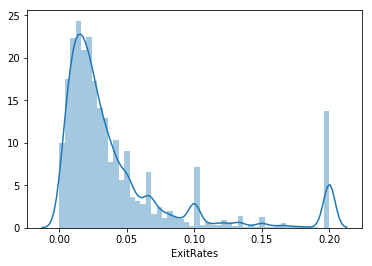

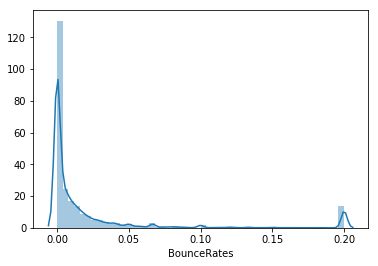

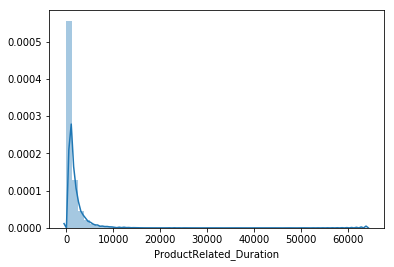

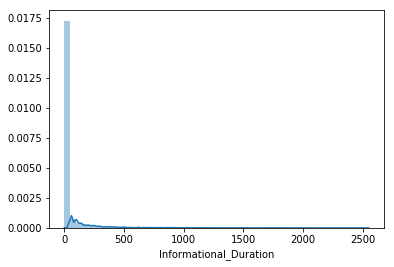

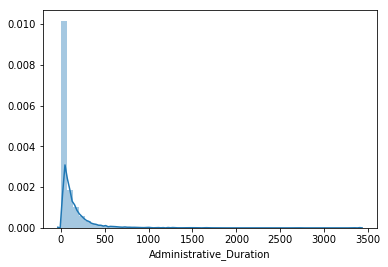

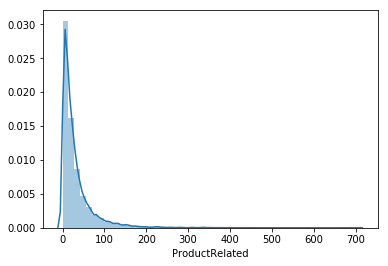

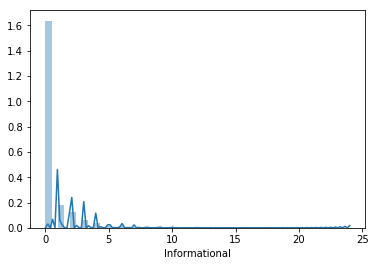

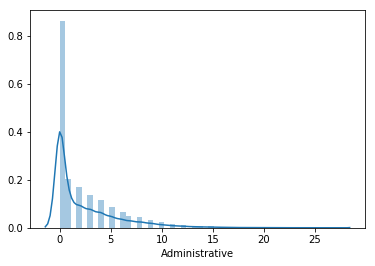

In [14]:
# Distribution of ExitRates
exhit_dist = sns.distplot(df['ExitRates'].dropna())
plt.show()

# Distribution of BounceRates
bounce_dist = sns.distplot(df['BounceRates'].dropna())
plt.show()

# Distribution of ProductRelated_Duration
productduration_dist = sns.distplot(df['ProductRelated_Duration'].dropna())
plt.show()

# Distribution of Informational_Duration
informationalduration_dist = sns.distplot(df['Informational_Duration'].dropna())
plt.show()

# Distribution of Administrative_Duration
administrative_dist = sns.distplot(df['Administrative_Duration'].dropna())
plt.show()

# Distribution of ProductRelated
productrelated_dist = sns.distplot(df['ProductRelated'].dropna())
plt.show()

# Distribution of Informational
informational_dist = sns.distplot(df['Informational'].dropna())
plt.show()

# Distribution of Administrative
administrative_dist = sns.distplot(df['Administrative'].dropna())
plt.show()



### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice. Answer this question for each of the tasks 2 and 3.

For task 2, the purpose of the clustering model is to profile customers based on the time they spend on the website. We will include Administrative Duration, Informational Duration and Product Related Duration variables. These variables measure the total time spent in each of these page categories.

For task 3, More information such as where the users come from and when they access the website will be included in the clustering analysis. We will also include Region, SpecialDay, Month and Weekend in spite of variables mentioned in task 2. 

## Task 2. The first clustering  model

### 1. Build a clustering model

In [15]:
# take 3 variables and drop the rest
df_time = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# convert df_time to matrix
X_time = df_time.as_matrix()

Elbow method is used to set the K value. In this method, a plot is draw between the k values and the clustering error. The main idea of elbow method is to find K at which the error decreases abruptly. 

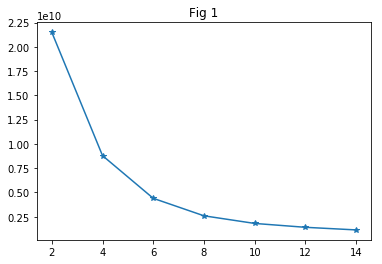

In [16]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X_time)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title("Fig 1")
plt.show()

#### 1.a What is the optimal number of clusters?

silhouette_score returns mean silhouette score of 0.67 for k = 4, 0.60 for k = 6 and 0.55 for k =8. This shows cluster in k = 4 are more appropriately matched to its own cluster then k = 6. Therefore, we choose k=4 as the optimal k.

In [17]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_time, clusters[1].predict(X_time)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_time, clusters[2].predict(X_time)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X_time, clusters[3].predict(X_time)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.6756725153907204
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.6091859121445686
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.5595425112426197


Sum of intra-cluster distance: 8793365215.647491
Centroid locations:
[ 149.25328579   76.57613648 2891.35984644]
[ 223.50699826  193.05368477 8424.42010158]
[ 58.89661437  18.35470927 526.73690098]
[ 1558.19630558  1034.0325     30277.952413  ]
Cluster membership
2    9696
0    2240
1     337
3      10
Name: Cluster_ID, dtype: int64


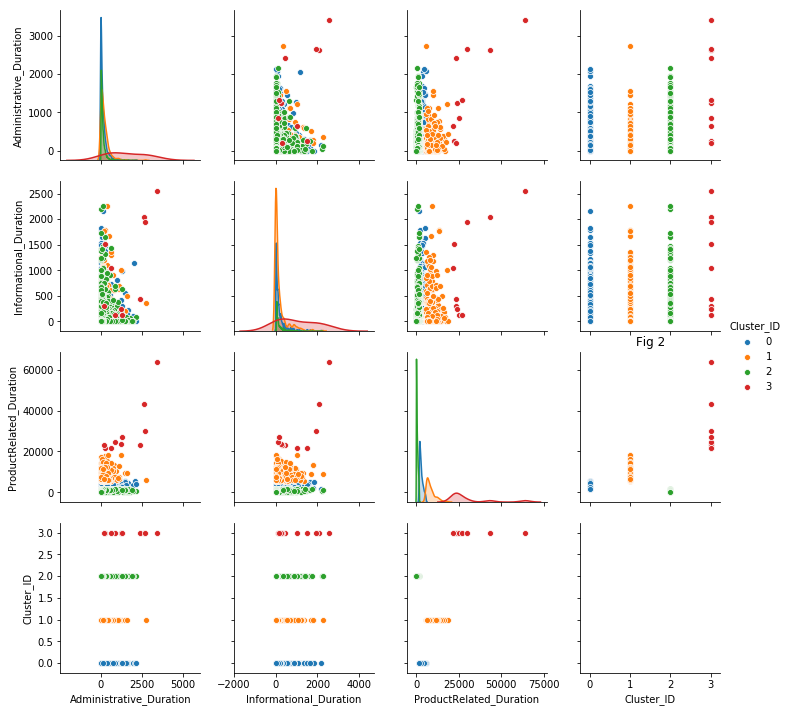

In [18]:
# make a model with optimal clusters
model = KMeans(n_clusters=4, random_state=42, n_jobs=10).fit(X_time) 
y = model.predict(X_time) # Make a prediction
df_time['Cluster_ID'] = y # Save it

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

# how many records are in each cluster
print("Cluster membership")
print(df_time['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_time, hue='Cluster_ID')
plt.title('Fig 2')
plt.show()

Distribution for cluster 0


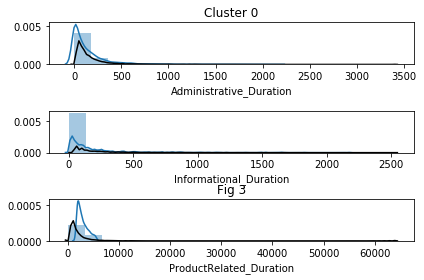

Distribution for cluster 1


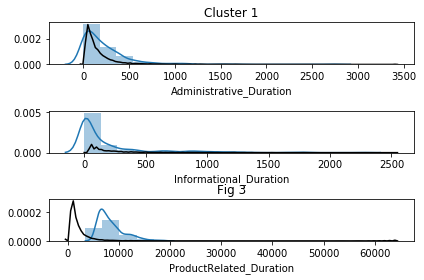

Distribution for cluster 2


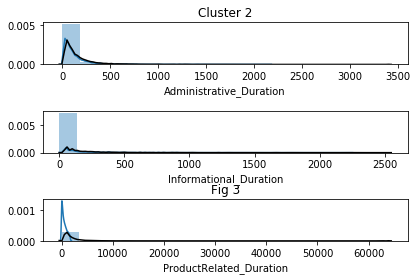

Distribution for cluster 3


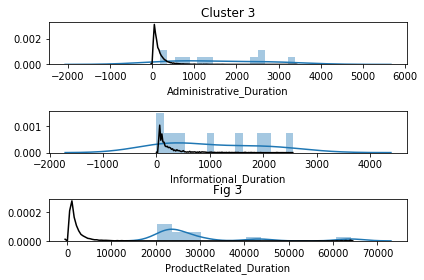

In [19]:
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
n_bins = 20

clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_time[col]), max(df_time[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_time[df_time['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_time[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.title('Fig 3')
    plt.show()

#### 1.b:For the model with the optimal number of clusters, list the variables that were found important in determing the clusters?

Administrative_Duration is an important variable to determine Cluster 3. Information_Duration is important to determine cluster 1 and cluster 3. ProductRelated_Duration is an important for all the clusters, because these 3 clusters are all different on this charactersitic.

#### 1c. Explain the cluster results.

Cluster 0: Slightly lower Administrative_Duration and Informational_Duration and silghtly higher ProductRelated_Duration.

Cluster 1: Lower Informational_Duration and higher ProducRelated_Duration.

Cluster 2: lower ProductRelated_Duration.

Cluster 3: lower Administration_Duration, Informational_Duration and higher ProductRelated_Duration.

### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

Standardizing the data reduces intercluster distance. In this model, each cluster has a strong character and unique distribution, except cluster 2. Therefore, the standardlised input results in a better solution in this case.

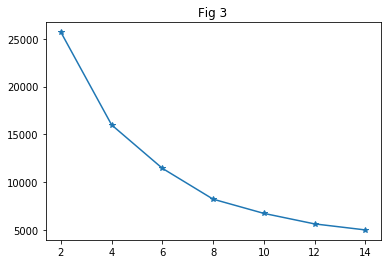

In [20]:
# Do it again but scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X_time)

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title('Fig 3')
plt.show()


In [21]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.6520435473596444
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.532338293047659
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.558193853434576


By using the standalization method, the optimal k is 4.

Cluster membership
1    10657
0     1024
3      420
2      182
Name: Cluster_ID, dtype: int64
Sum of intra-cluster distance: 15977.745988263705
Centroid locations:
[0.31234399 0.32442787 2.09538688]
[-0.19562398 -0.15352375 -0.25208058]
[1.00200756 6.60942417 1.82687722]
[3.76799805 0.24041249 0.49584508]


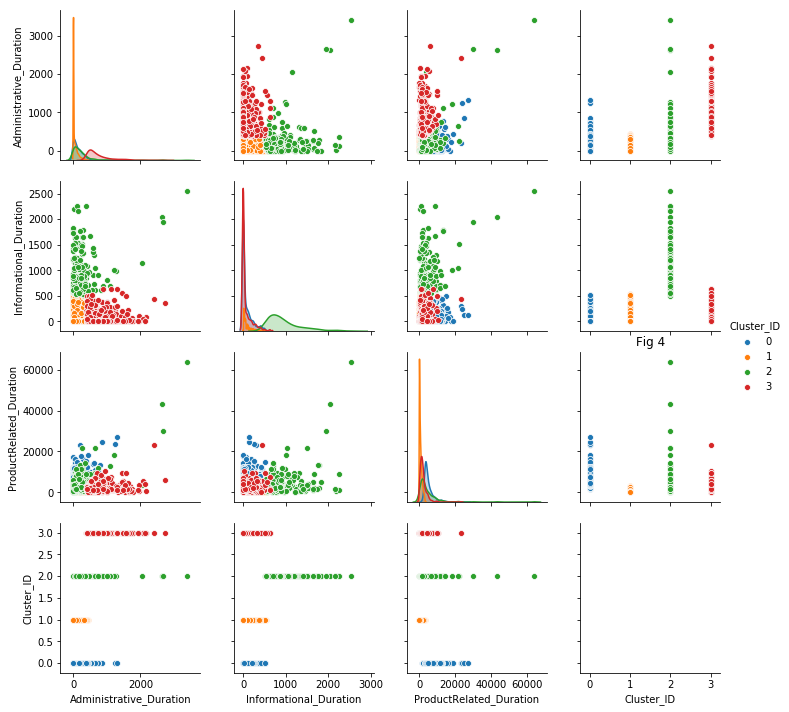

In [22]:
# make a model with optimal clusters
model = KMeans(n_clusters=4, random_state=42, n_jobs=10).fit(X) 
y = model.predict(X) # Make a prediction
df_time['Cluster_ID'] = y # Save it

# how many records are in each cluster
print("Cluster membership")
print(df_time['Cluster_ID'].value_counts())

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)


# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_time, hue='Cluster_ID')
plt.title('Fig 4')
plt.show()

### 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label and a brief description.

Cluster 0: slightly lower Informational_Duration and silghtly higher ProductRelated_Duration. Subsurbs in cluster 0 are cluster with lower Informational_Duration and higher ProductRelated_Duration.

Cluster 1: lower Administrative_Duration, Informational_Duration and lower ProductRelated_Duration.

Cluster 2: higher Informational_Duration with small average Administrative_Duration and ProductRelated_Duration.

Cluster 3: higher Administrative_Duration and lower information_Duration.

Distribution for cluster 0


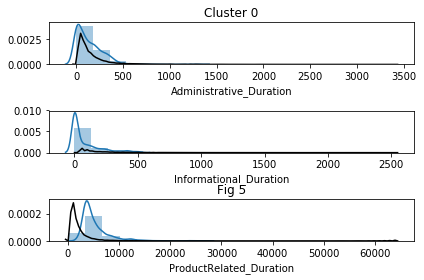

Distribution for cluster 1


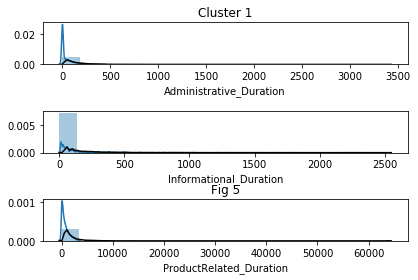

Distribution for cluster 2


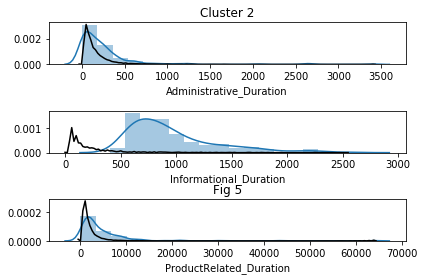

Distribution for cluster 3


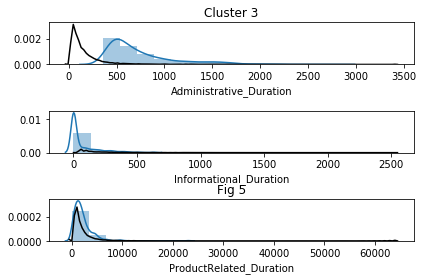

In [23]:
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
n_bins = 20

clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_time[col]), max(df_time[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_time[df_time['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_time[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.title('Fig 5')
    plt.show()

## Task 3. Refining the clustering model

### 1. Add more information such as where the users come from and when they access the website, to the clustering analysis

In [24]:
df_Refine = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Region', 'SpecialDay', 'Month', 'Weekend']]
Month_map = {'Feb':2, 'Mar': 3,'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_Refine['Month'] = df['Month'].map(Month_map)
df_Refine.Weekend = df_Refine.Weekend.astype('uint8')



In [25]:
# convert df_Refine to matrix
X_refine = df_Refine.as_matrix() # Make a matrix

#### 1a. What is the optimal number of clusters?

From the plot of Elbow Effect, we can find the Elbow at k=3 or k=4. And, the silhouette scores tell us the k = 3 is better match to its own cluster. Hence, we pick k = 3 for this case.

In [29]:
def ElbowEffectAndSilhouetteScoreKprototype(data, kRunRange):
    '''
    Use KPropotype
    '''
    clusters = []
    inertial_vals = []
    silhouette_scores = []
    
    cat_cols = [  i for i, colName in enumerate(df_Refine.columns) if not df_Refine[colName].dtype == np.float]
    
    
    for i in kRunRange:
        model = KPrototypes(n_clusters=i, random_state=42, init='Huang')
        model.fit(df_Refine, categorical=cat_cols)
        clusters.append(model)
        inertial_vals.append(model.cost_)
        silhouette_scores.append(silhouette_score(df_Refine, model.predict(df_Refine, cat_cols)))
    
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(kRunRange, inertial_vals, marker='o', label='Inertial_vals')
    plt.ylabel('Inertial_vals', fontsize=22)
    plt.xlabel('Number of clusters', fontsize=22)    
    
    plt.subplot(212)
    plt.plot(kRunRange, silhouette_scores, marker='o', label="silhouette_scores")
    plt.ylabel('Silhouette_scores', fontsize=22)
    plt.xlabel('Number of clusters', fontsize=22)
    
    plt.tight_layout()
    plt.show()
    return clusters

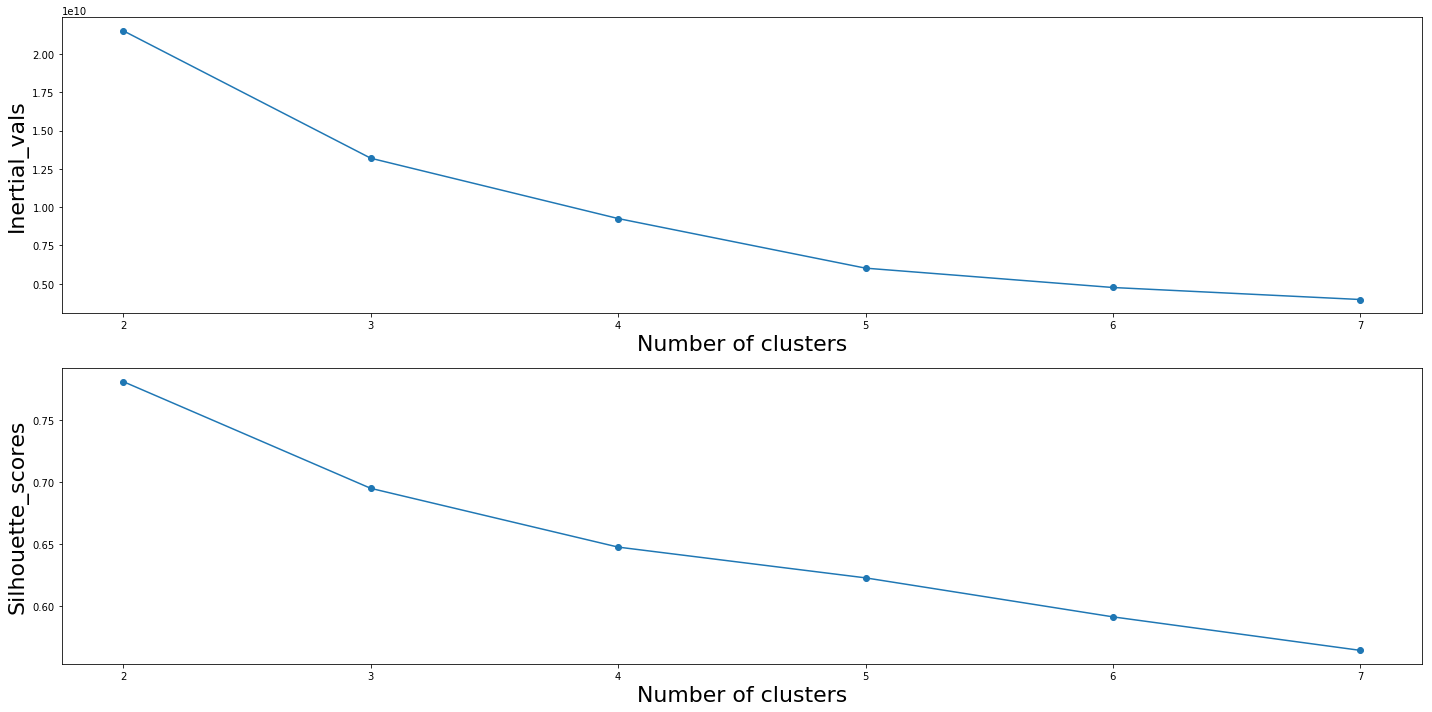

In [31]:
refinedClusters = ElbowEffectAndSilhouetteScoreKprototype(df_Refine, list(range(2,8)))

#### 1b. Whether this model has different variable importance than the previous model (Task 2.1)? 

Administration_Duration is important to determine Cluster 1. Informational_Duration and ProductRelated_Duration are important variables for all cluster 0, 1 and 2.

In [35]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test = KPrototypes(n_clusters=3, init="Huang")
y= test.fit_predict(X_refine, categorical=[1])
df_Refine['Cluster_ID'] = y
print("Cluster membership")
print(df_Refine['Cluster_ID'].value_counts())
        


Cluster membership
0    10099
1     1976
2      208
Name: Cluster_ID, dtype: int64


In [37]:
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", test.cost_)

Sum of intra-cluster distance: 12960717739.542912


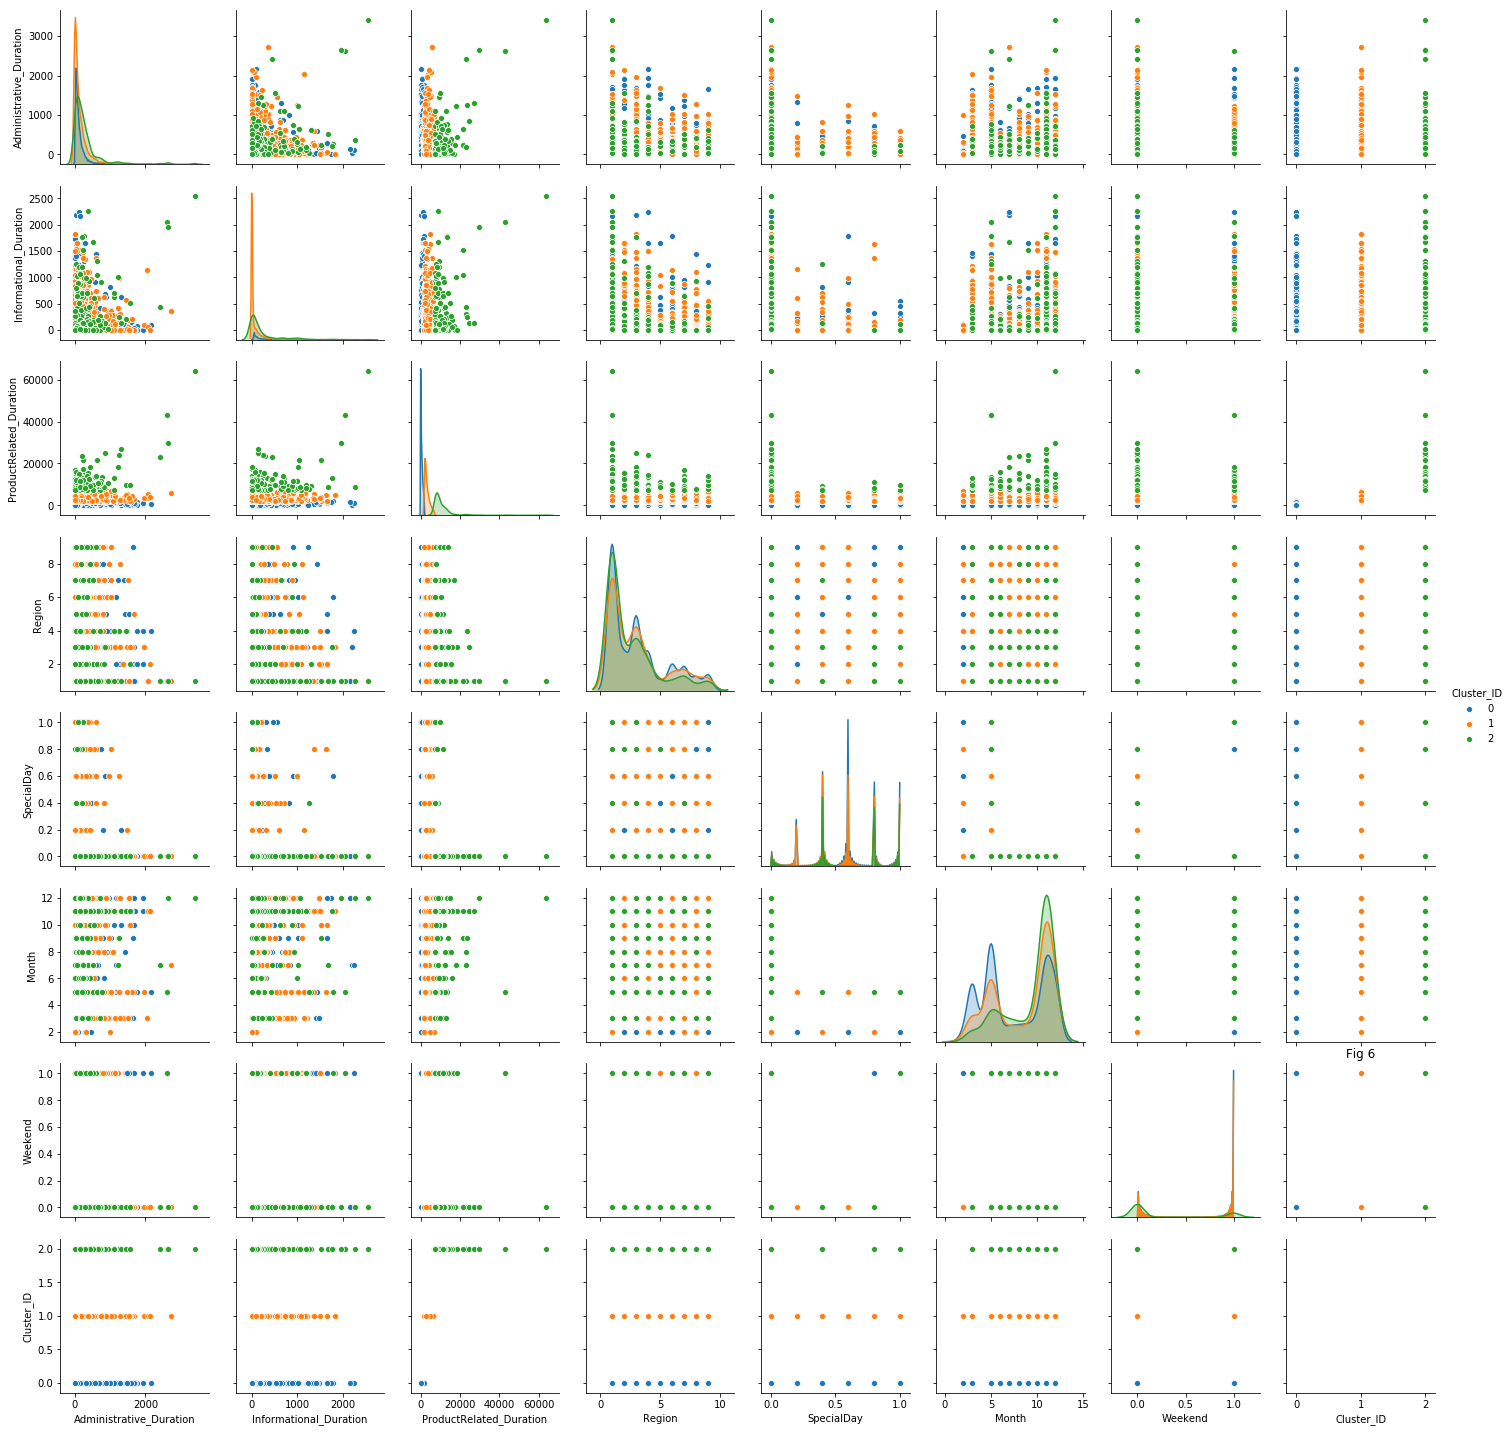

In [38]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_Refine, hue='Cluster_ID')
plt.title('Fig 6')
plt.show()

Distribution for cluster 0


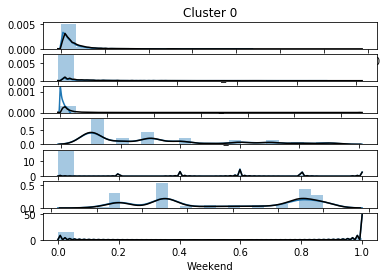

Distribution for cluster 1


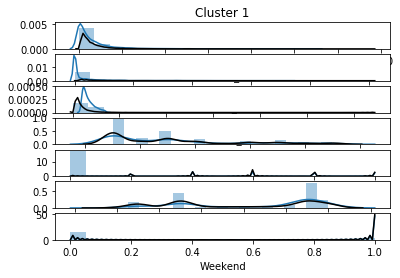

Distribution for cluster 2


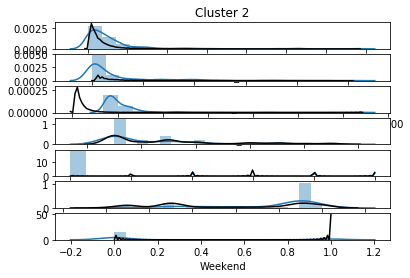

In [39]:
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Region', 'SpecialDay', 'Month', 'Weekend']
n_bins = 20


clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:

    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=7)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_Refine[col]), max(df_Refine[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_Refine[df_Refine['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_Refine[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()


#### 1c. Explain the cluster results

Cluster 0: Slightly lower Informational_Duration and slightly higher ProductRelated_Duration.
Cluster 1: Slightly lower Administrative_Duration and Informational_Duration. silghtly higher ProductRelated_Duration.
Cluster 2: Lower Informational_Duration and higher ProductRelated_Duration.

### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

Its clear comparing the pair plots from the normalised and the non-normalised versions that there are clearer groupings in the normalised version. This grouping becomes clear for variables such as Region, Month and Weekend. Standardizing the data redcuces intercluster distance.

In [41]:
# Do it again but scale the data
scaler = StandardScaler()
ThreeX_refine = scaler.fit_transform(X_refine)

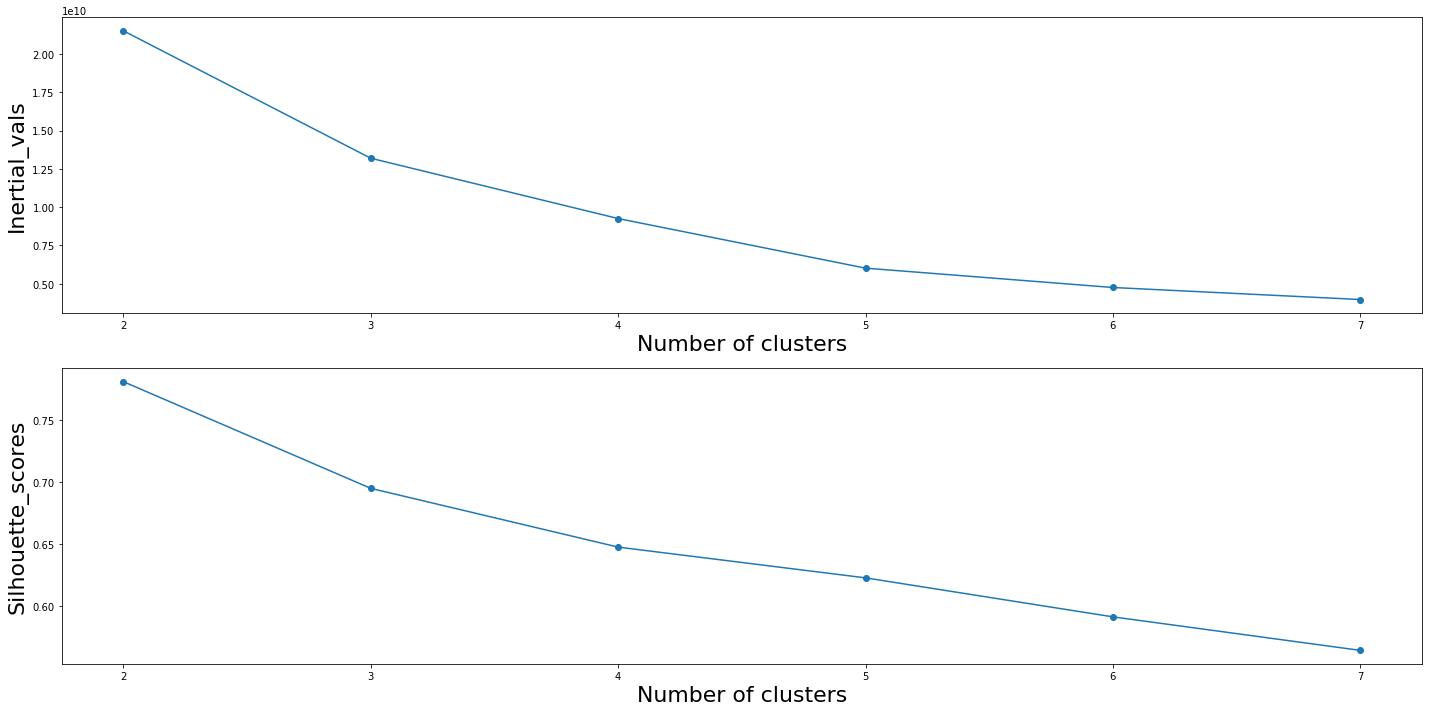

In [43]:
refinedClusters_Standard= ElbowEffectAndSilhouetteScoreKprototype(ThreeX_refine, list(range(2,8)))

By using the standalization method, the optimal k is 3.

In [45]:
test = KPrototypes(n_clusters=3, init="Huang")
y= test.fit_predict(ThreeX_refine, categorical=[1])
df_Refine['Cluster_ID'] = y
print("Cluster membership")
print(df_Refine['Cluster_ID'].value_counts())

Cluster membership
1    8512
0    2702
2    1069
Name: Cluster_ID, dtype: int64


In [46]:
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", test.cost_)

Sum of intra-cluster distance: 51403.87101279187


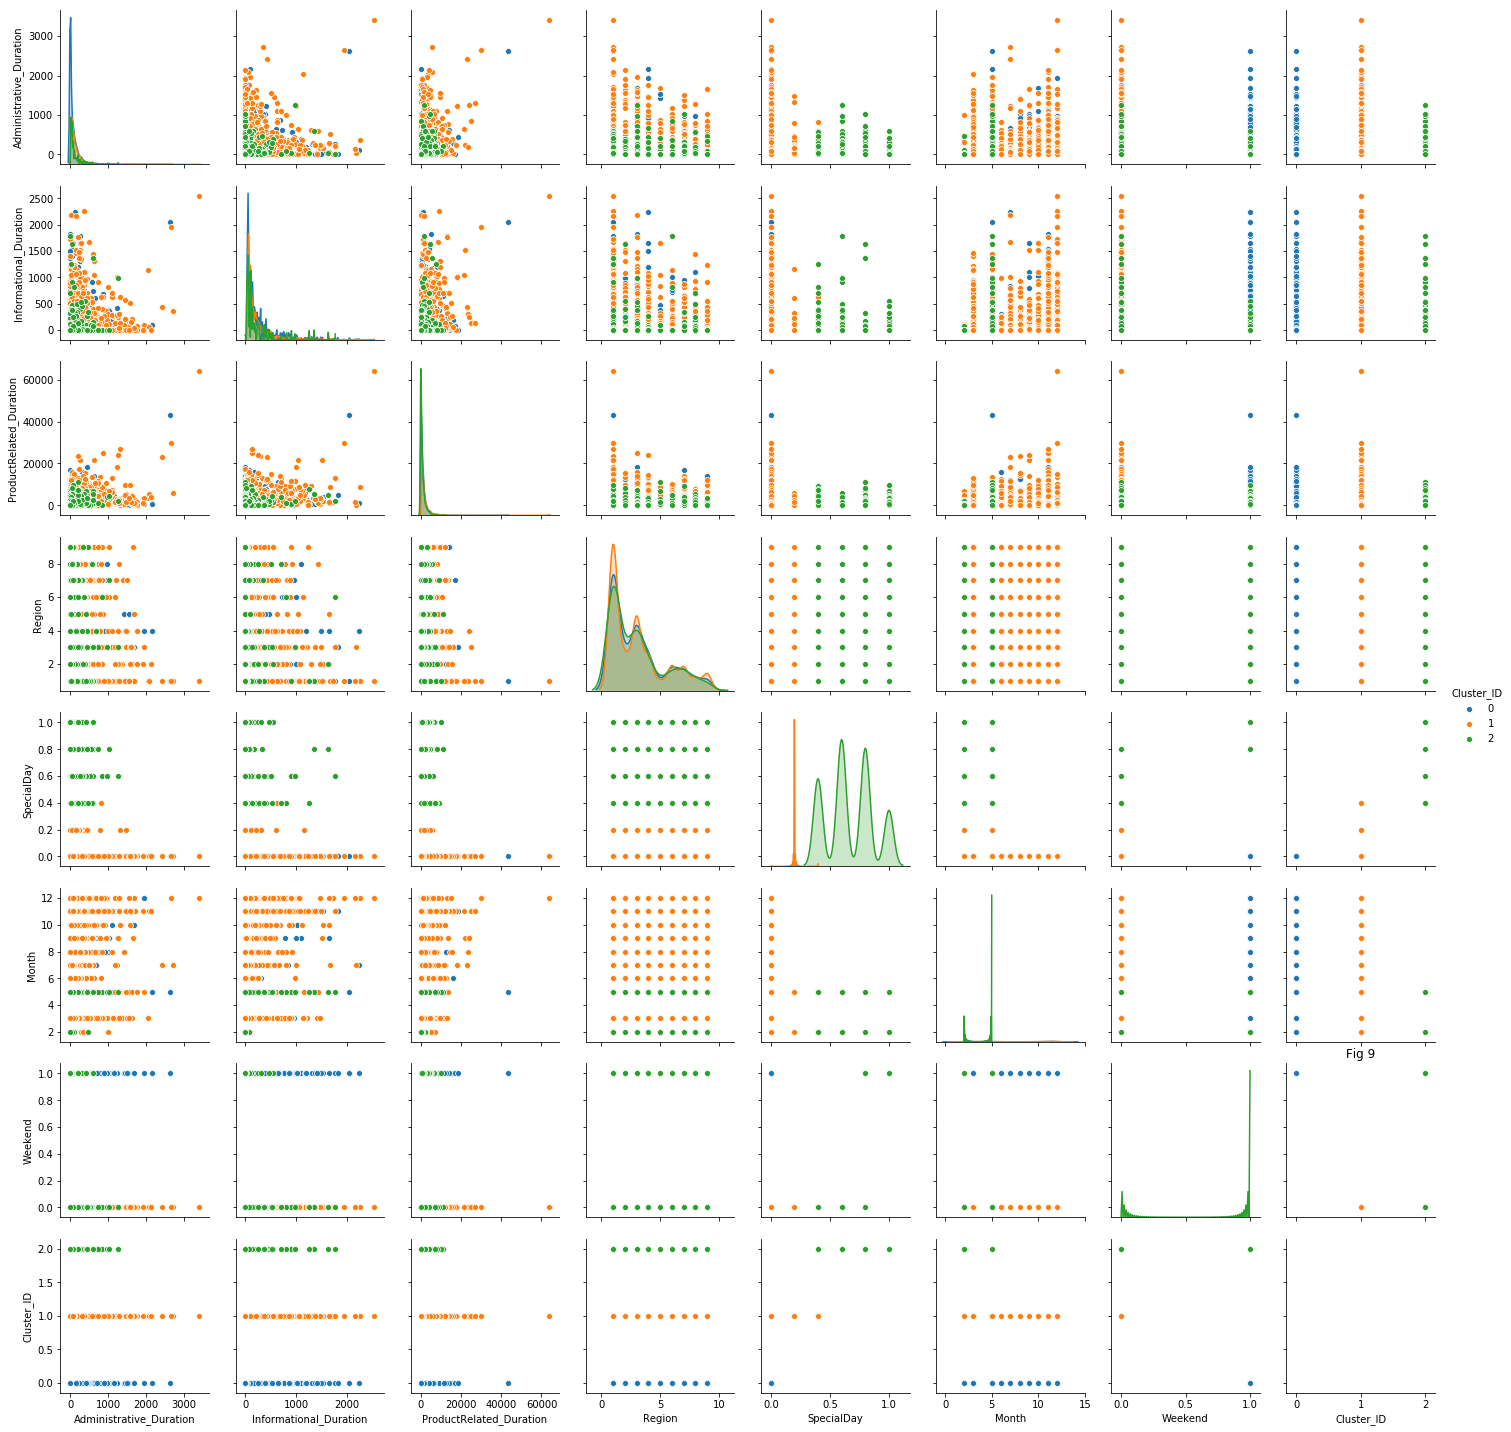

In [47]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_Refine, hue='Cluster_ID')
plt.title('Fig 9')
plt.show()

Distribution for cluster 0


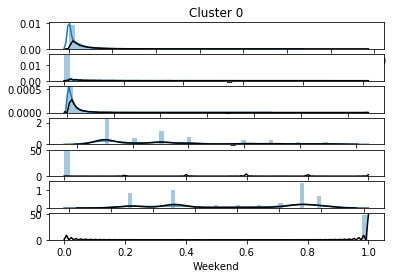

Distribution for cluster 1


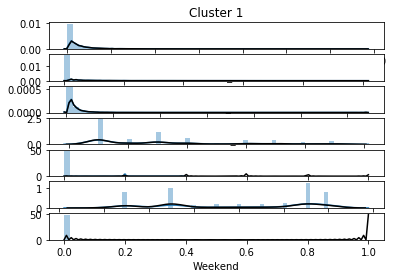

Distribution for cluster 2


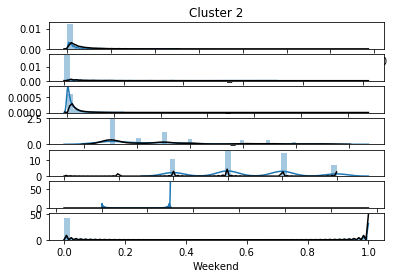

In [48]:
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Region', 'SpecialDay', 'Month', 'Weekend']

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=7)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_Refine[col]), max(df_Refine[col]))
        # plot distribution of the cluster using histogram
        sns.distplot(df_Refine[df_Refine['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_Refine[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

### 3. Can you highlight the differences between the two clustering solutions (Tasks 2.1& 3.1) focusing on cluster interpretation? In other words, explain what is the effect of adding other variables in the clustering analysis?

By adding the addition fields, it becomes evident that the cluster are more likely to be clustered according the gengraphical details and temporal details.

#### Decision Making: Finally, could you detail - how the outcome of clustering analysis can be used by decision makers?

From the time duration model, knowing the habits of users who purchase can help decision makers to target potential customers. From model about location and dates, knowing the common locations and time, decision makers can do better advertise based on user groups.

# Task 4. Association mining

In [49]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import subprocess
import re

In [28]:
df_retail = pd.read_csv('online retail.csv',header=0,encoding = 'unicode_escape')

C:\Users\n10074520\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df_retail.info()
print(df_retail.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21

In [30]:
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df_retail[cols].unique())
        print(df_retail[cols].value_counts())
        print("-"*20)
        
describeDataset(df_retail)

[536365 536366 536367 ... 581585 581586 581587]
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
580367     650
580115     645
581439     635
580983     629
578344     622
538349     620
578347     606
537638     601
537237     597
536876     593
576617     593
536592     592
537823     591
576837     585
579508     578
577078     572
537240     568
577358     561
576618     552
576840     544
          ... 
570294       1
570338       1
553659       1
570403       1
541505       1
565045       1
547519       1
570417       1
570440       1
570441       1
553652       1
570451       1
547522       1
570461       1
547531       1
541487       1
547524       1
570474       1
541482       1
570481       1
570485       1
570489       1
570493       1
547525       1
547526       1
547527       1
547528       1
547529       1
547530       1
572689       1
Name: InvoiceNo, Length: 22064, dtype

## 1. Can you identify data quality issues in this dataset for performing association analysis?

In [31]:
#remove negative values in quantiy column as it is not necessaory values in terms of analysis of association.
df_retail.drop(df_retail[df_retail.Quantity < 0].index, inplace=True)

In [32]:
# remove inappropriate values in StockCode
df_retail['StockCode'].replace(['85123A','85099B'],['85123','85099'],inplace = True)
df_retail.drop(df_retail[df_retail.StockCode == 'DCGS0073'].index, inplace=True)
df_retail.drop(df_retail[df_retail.StockCode == 'DCGS0069'].index, inplace=True) 
df_retail.drop(df_retail[df_retail.StockCode == 'DCGS0068'].index, inplace=True) 
df_retail.drop(df_retail[df_retail.StockCode == 'DCGS0067'].index, inplace=True) 
df_retail.drop(df_retail[df_retail.StockCode == 'DCGS0003'].index, inplace=True) 
df_retail.drop(df_retail[df_retail.StockCode == 'm'].index, inplace=True)
df_retail.drop(df_retail[df_retail.StockCode == 'POST'].index, inplace=True)
df_retail.drop(df_retail[df_retail.StockCode == 'S'].index, inplace=True)

In [33]:
df_retail['StockCode'].unique()
df_retail['StockCode'].value_counts()

85123     2270
85099     2115
22423     2019
47566     1707
20725     1595
84879     1489
22197     1426
22720     1401
21212     1370
20727     1328
22383     1327
22457     1263
23203     1250
22386     1238
22469     1227
22086     1200
21931     1197
22411     1190
22382     1179
20728     1174
22961     1169
23298     1167
22960     1142
22666     1133
23209     1124
22384     1117
82482     1111
22993     1102
22699     1084
22727     1074
          ... 
23605        1
85224        1
84750A       1
22146        1
23617        1
84963B       1
90100        1
84613C       1
47591b       1
84661a       1
90048        1
46776f       1
35597B       1
90127A       1
85126        1
21410        1
17028J       1
84206B       1
35951        1
62095B       1
84705C       1
22275        1
21310        1
35833G       1
85115B       1
90037A       1
84854        1
47016        1
21160        1
90142A       1
Name: StockCode, Length: 3936, dtype: int64

## 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

In [34]:
df_retail = df_retail.dropna(subset = ['Description'])

In [35]:
transactions = df_retail.groupby(['InvoiceNo'])['Description'].apply(list)
print(transactions.head(5))

InvoiceNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
Name: Description, dtype: object


InvoiveNo and Description were variables are included in the analysis.

## 3. Conduct association mining and answer the following: a. What is the highest lift value for the resulting rules? Which rule has this value? 

In [36]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 


In [37]:
# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.005, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2))

# print first 5 rules
print(results[:5])


[RelationRecord(items=frozenset({'SPACEBOY BEAKER', ' DOLLY GIRL BEAKER'}), support=0.006181763796799441, ordered_statistics=[OrderedStatistic(items_base=frozenset({' DOLLY GIRL BEAKER'}), items_add=frozenset({'SPACEBOY BEAKER'}), confidence=0.7126436781609194, lift=77.68978010994502), OrderedStatistic(items_base=frozenset({'SPACEBOY BEAKER'}), items_add=frozenset({' DOLLY GIRL BEAKER'}), confidence=0.6739130434782608, lift=77.68978010994502)]), RelationRecord(items=frozenset({'LUNCH BOX I LOVE LONDON', ' SET 2 TEA TOWELS I LOVE LONDON '}), support=0.005035146318360836, ordered_statistics=[OrderedStatistic(items_base=frozenset({' SET 2 TEA TOWELS I LOVE LONDON '}), items_add=frozenset({'LUNCH BOX I LOVE LONDON'}), confidence=0.37546468401486993, lift=10.652681890600107)]), RelationRecord(items=frozenset({'12 PENCILS SMALL TUBE RED RETROSPOT', '12 PENCIL SMALL TUBE WOODLAND'}), support=0.0066304402014058525, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12 PENCIL SMALL TUB

In [38]:
result_df = convert_apriori_results_to_pandas_df(results)
print(result_df.head(20))

                              Left_side                           Right_side  \
0                     DOLLY GIRL BEAKER                      SPACEBOY BEAKER   
1                       SPACEBOY BEAKER                    DOLLY GIRL BEAKER   
2       SET 2 TEA TOWELS I LOVE LONDON               LUNCH BOX I LOVE LONDON   
3         12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT   
4   12 PENCILS SMALL TUBE RED RETROSPOT        12 PENCIL SMALL TUBE WOODLAND   
5         12 PENCIL SMALL TUBE WOODLAND          12 PENCILS SMALL TUBE SKULL   
6           12 PENCILS SMALL TUBE SKULL        12 PENCIL SMALL TUBE WOODLAND   
7         12 PENCIL SMALL TUBE WOODLAND              LUNCH BAG RED RETROSPOT   
8         12 PENCIL SMALL TUBE WOODLAND      PACK OF 72 RETROSPOT CAKE CASES   
9         12 PENCIL SMALL TUBE WOODLAND      PAPER CHAIN KIT 50'S CHRISTMAS    
10        12 PENCIL SMALL TUBE WOODLAND      SET 12 COLOUR PENCILS SPACEBOY    
11      SET 12 COLOUR PENCILS SPACEBOY  

In [39]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(15))

                                Left_side  \
1486      CHRISTMAS TREE HEART DECORATION   
1485  CHRISTMAS TREE DECORATION WITH BELL   
1488       CHRISTMAS TREE STAR DECORATION   
1487  CHRISTMAS TREE DECORATION WITH BELL   
5594           SET/6 COLLAGE PAPER PLATES   
5593             SET/6 COLLAGE PAPER CUPS   
4415         PACK OF 6 SKULL PAPER PLATES   
4414           PACK OF 6 SKULL PAPER CUPS   
1592             DOLLY GIRL CHILDRENS CUP   
1591            DOLLY GIRL CHILDRENS BOWL   
1491       CHRISTMAS TREE STAR DECORATION   
1490      CHRISTMAS TREE HEART DECORATION   
2581                    HERB MARKER THYME   
2580                 HERB MARKER ROSEMARY   
2565                  HERB MARKER PARSLEY   

                               Right_side   Support  Confidence       Lift  
1486  CHRISTMAS TREE DECORATION WITH BELL  0.005484    0.611111  98.066222  
1485      CHRISTMAS TREE HEART DECORATION  0.005484    0.880000  98.066222  
1488  CHRISTMAS TREE DECORATION WITH BELL  0.005

From the result above, the highest lift value is 100.76. There re two rules having this value: 
CHRISTMAS TREE DECORATION WITH BELL -> CHRISTMAS TREE HEART DECORATION and CHRISTMAS TREE HEART DECORATION -> CHRISTMAS TREE DECORATION WITH BELL.  

## b. What is the highest confidence value for the resulting rules? Which rule has this value? 

In [40]:
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(15))

                                Left_side                          Right_side  \
519   BEADED CRYSTAL HEART GREEN ON STICK                      DOTCOM POSTAGE   
536    BEADED CRYSTAL HEART PINK ON STICK                      DOTCOM POSTAGE   
851              CANDY SPOT CUSHION COVER                      DOTCOM POSTAGE   
2581                    HERB MARKER THYME                HERB MARKER ROSEMARY   
2564                  HERB MARKER CHIVES                  HERB MARKER PARSLEY   
2580                 HERB MARKER ROSEMARY                   HERB MARKER THYME   
1911                SOFT PINK ROSE TOWEL                       DOTCOM POSTAGE   
5219               REGENCY TEA PLATE PINK            REGENCY TEA PLATE GREEN    
2562                  HERB MARKER CHIVES                     HERB MARKER MINT   
2568                  HERB MARKER CHIVES                    HERB MARKER THYME   
2566                  HERB MARKER CHIVES                 HERB MARKER ROSEMARY   
2576                  HERB M

From the result above, the highest confidence value is 98.83%. The rule has this value is BEADED CRYSTAL HEART GREEN ON STICK -> DOTCOM POSTAGE. 

## c. Discuss and explain the results. Interpret them to discuss the rule-set obtained.

In [41]:
support = result_df['Support'].as_matrix()
confidence = result_df['Confidence'].as_matrix()
lift = result_df['Lift'].as_matrix()
lift

C:\Users\n10074520\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\n10074520\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\n10074520\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([28.00247996, 27.64425292, 26.74533333, ...,  3.54086496,
        4.86278788,  3.03924242])

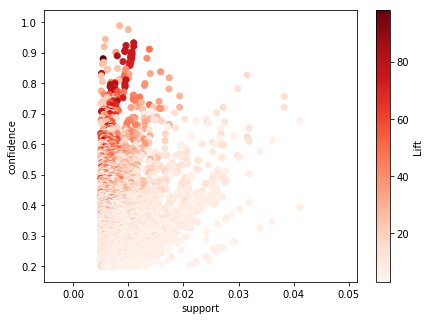

In [42]:
plt.figure(3, figsize=(7,5))
plt.scatter(support, confidence, c=lift, cmap='Reds')
plt.xlabel('support')
plt.ylabel('confidence') 

plt.colorbar().set_label('Lift')

## 4. The store is particularly interested in products that individuals purchase when they buy “HERB MARKER CHIVES”. 

### a. How many rules are in the subset?

There are 5 rules are in the subset.

In [43]:
search = result_df[result_df['Left_side'] == 'HERB MARKER CHIVES ']
print(search)

                Left_side            Right_side   Support  Confidence  \
2564  HERB MARKER CHIVES    HERB MARKER PARSLEY  0.009622    0.923445   
2562  HERB MARKER CHIVES       HERB MARKER MINT  0.009472    0.909091   
2568  HERB MARKER CHIVES      HERB MARKER THYME  0.009422    0.904306   
2566  HERB MARKER CHIVES   HERB MARKER ROSEMARY  0.009422    0.904306   
2553  HERB MARKER CHIVES      HERB MARKER BASIL  0.009073    0.870813   

           Lift  
2564  77.829339  
2562  75.981061  
2568  76.537884  
2566  75.581160  
2553  72.180355  


### b. Based on the rules, what are the other products these individuals are most likely to purchase? 

From the result above, the most common bought items with 'HERB MARKER CHIVES' are 'HERB MARKER PARSLEY', 'HERB MARKER MINT', 'HERB MARKER ROSEMARY'.

## 5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why?


In [63]:
df_seq = df_retail[['InvoiceNo', 'Description', 'Quantity']].sort_values(by=['Quantity'], ascending=True).dropna()
transactions = df_seq.groupby(['InvoiceNo', 'Quantity'])['Description'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:5])

[['SET 7 BABUSHKA NESTING BOXES'], ['WHITE METAL LANTERN', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER'], ['CREAM CUPID HEARTS COAT HANGER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['BOX OF VINTAGE ALPHABET BLOCKS']]


In [68]:
from collections import defaultdict
import subprocess
import re
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'C:/Users/n10074520/Desktop/Assignment/IFN645CASE2/spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'C:/Users/n10074520/Desktop/Assignment/IFN645CASE2/seq_rule_output.txt', supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('C:/Users/n10074520/Desktop/Assignment/IFN645CASE2/seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])


In [75]:
rule = get_association_rules(sequences, 0.05, 0.7)

AttributeError: 'NoneType' object has no attribute 'groups'

## 6. How the outcome of this study can be used by decision makers?

The company can use the rules to obtain the understanding oc consumers' needs and behaviours. Decision makers will understand that there are several items that are often bought together. If they can put these items together, revenue can get increased. 

# Task 5. Texting mining

In [206]:
import nltk
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from string import digits
 # -*- coding: gbk -*-
import sys
from imp import reload
reload(sys)
import os
import os.path
import time

In [207]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

## 1.What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice

Because the source folder only contains txt files,so txt file content is the only variable we use in text mining analysis.  
During analysis,we will use frequency,terms as variables to analyse.

In [208]:
filePaths=[]
fileContents=[]
for root,dirs,files in os.walk('txt/text-files-to-mine/'):
    for name in files:
        filePath=os.path.join(root,name)
        filePaths.append(filePath)
        f=codecs.open(filePath,'r','utf-8')
        fileContent=f.read()
        f.close()
        fileContents.append(fileContent)

import pandas
df=pandas.DataFrame({
    'fileContent':fileContents
})
rs = 42

In [209]:
df

,fileContent
0,Claxton hunting first major medal\n\nBritish h...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,Greene sets sights on world title\n\nMaurice G...
3,IAAF launches fight against drugs\n\nThe IAAF ...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."
5,Isinbayeva claims new world best\n\nPole vault...
6,O'Sullivan commits to Dublin race\n\nSonia O'S...
7,Hansen 'delays return until 2006'\n\nBritish t...
8,Off-colour Gardener storms to win\n\nBritain's...
9,Collins to compete in Birmingham\n\nWorld and ...


## 2.Can you identify data quality issues in order to perform text mining

There are 200 different txt files inside the source folder,so firstly we need to put all the txt file inside dataframe for further analysis,then i found that this txt files contains lots of unnecessary characters like digits,sapce and punctuation,so we remove all this useless charater and make all the other characters low case for analysing.
Secondly,too manys stopwords need to be deleted like 'he','she' and 'it' to improve accuracy.
Finally lemmatizer is used to make the words to their basic format.

In [210]:

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# join provided stopwords with the default NLTK English stopwords
stopwords = set(sw.words('english'))
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [211]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            remove_digits = str.maketrans('', '', digits)
            token = token.translate(remove_digits)
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')
            

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

34819


In [213]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [214]:
# function to visualise text cluster. Useful for the assignment too :)

def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: cricket, sri, icc, sri lanka, lanka, 
Top terms for cluster 1: club, want, liverpool, £, say, 
Top terms for cluster 2: pakistan, wicket, test, ball, australia, 
Top terms for cluster 3: athens, olympic, world, year, open, 
Top terms for cluster 4: england, ireland, wale, scotland, nation, 
Top terms for cluster 5: say, play, game, win, player, 
Top terms for cluster 6: cross country, chepkemei, country, cross, marathon, 


The output above shows the terms characterising each cluster.Unfortunately, this clustering solution does not give good grouping.Too many repeated items appeared in a same cluster like 'sri' and 'sir lanka'.Also there are some meaning less high tf value like 'say' and 'year',we also need to fliter this words in the next few steps.

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['fileContent'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df)

In [216]:
terms

[{'term': 'claxton', 'idx': 5251, 'tf': 7, 'df': 1},
 {'term': 'hunt', 'idx': 14488, 'tf': 2, 'df': 2},
 {'term': 'first', 'idx': 10793, 'tf': 185, 'df': 89},
 {'term': 'major', 'idx': 18027, 'tf': 24, 'df': 19},
 {'term': 'medal', 'idx': 18848, 'tf': 28, 'df': 14},
 {'term': 'british', 'idx': 3931, 'tf': 30, 'df': 20},
 {'term': 'hurdler', 'idx': 14497, 'tf': 2, 'df': 2},
 {'term': 'sarah', 'idx': 25817, 'tf': 1, 'df': 1},
 {'term': 'confident', 'idx': 6034, 'tf': 14, 'df': 12},
 {'term': 'win', 'idx': 33779, 'tf': 246, 'df': 102},
 {'term': 'next', 'idx': 20334, 'tf': 86, 'df': 59},
 {'term': 'month', 'idx': 19504, 'tf': 65, 'df': 52},
 {'term': 'european', 'idx': 9433, 'tf': 38, 'df': 26},
 {'term': 'indoor', 'idx': 14853, 'tf': 33, 'df': 15},
 {'term': 'championship', 'idx': 4769, 'tf': 40, 'df': 31},
 {'term': 'madrid', 'idx': 17943, 'tf': 36, 'df': 18},
 {'term': 'year', 'idx': 34472, 'tf': 308, 'df': 134},
 {'term': 'old', 'idx': 20783, 'tf': 88, 'df': 74},
 {'term': 'already', 

 --- Least Useful Terms --- 
Frequency descending :
say Term Frequency 447    Document Frequency 168
year Term Frequency 308    Document Frequency 134
game Term Frequency 249    Document Frequency 106
win Term Frequency 246    Document Frequency 102
play Term Frequency 240    Document Frequency 104
one Term Frequency 204    Document Frequency 104
go Term Frequency 203    Document Frequency 112
take Term Frequency 202    Document Frequency 112
england Term Frequency 199    Document Frequency 52
two Term Frequency 197    Document Frequency 103
------------------
Frequency Ascending :
mate mine Term Frequency 1    Document Frequency 1
mine shaun Term Frequency 1    Document Frequency 1
shaun threat Term Frequency 1    Document Frequency 1
threat play Term Frequency 1    Document Frequency 1
position also Term Frequency 1    Document Frequency 1
also play Term Frequency 1    Document Frequency 1
position believe Term Frequency 1    Document Frequency 1
still england Term Frequency 1    Doc

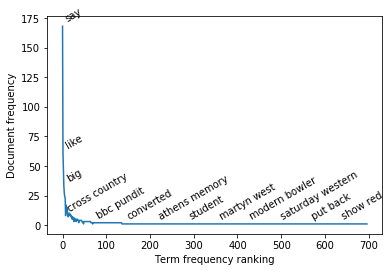

In [217]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    print(" --- Least Useful Terms --- ")
    print("Frequency descending :")
    for term in terms[0:10]:
        print(term['term'],  "Term Frequency" ,term['tf'] ,"   Document Frequency", term['df'])
    print("------------------")
    print("Frequency Ascending :")
    leng = len(terms) - 1
    for term in terms[(leng - 10):leng]:
        print(term['term'], "Term Frequency" ,term['tf'] ,"   Document Frequency", term['df'])
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
    
visualise_zipf(terms)

## 3.Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 


So we can find 10 least useful items from both the high end terms and low end terms.
#### Frequency descending :
* say  168 
* year  134 
* game   106 
* win  102 
* play  104 
#### Frequency Ascending : 
* mate mine  1 
* mine shaun  1 
* shaun threat  1 
* threat play  1 
* position also  1 

## 4.Did you disregard any frequent terms in addition to items automatically selected by the Filter tool?

In [218]:
#method to count term weighting 
import math
def weight(tf,df):
    return tf*math.log(6/df,10)

In [223]:
dfFre = [0]*200
for i, term in enumerate(terms):
    if i < 20:
        print(str(i + 1) + "\tTerm:", term['term'], "\tTerm weighting:", 
              (term['tf']*math.log(200/term['df'],10)), "\tTerm Frequency", term['tf'],"\tDocument Frequency", term['df']/200)
    dfFre[term['df'] - 1] += 1

1	Term: say 	Term weighting: 33.847159130338895 	Term Frequency 447 	Document Frequency 0.84
2	Term: year 	Term weighting: 53.56896076814546 	Term Frequency 308 	Document Frequency 0.67
3	Term: game 	Term weighting: 68.65530846940351 	Term Frequency 249 	Document Frequency 0.53
4	Term: win 	Term weighting: 71.93773667990764 	Term Frequency 246 	Document Frequency 0.51
5	Term: play 	Term weighting: 68.1591975276482 	Term Frequency 240 	Document Frequency 0.52
6	Term: one 	Term weighting: 57.93531789850097 	Term Frequency 204 	Document Frequency 0.52
7	Term: go 	Term weighting: 51.11783051774132 	Term Frequency 203 	Document Frequency 0.56
8	Term: take 	Term weighting: 50.86601854474752 	Term Frequency 202 	Document Frequency 0.56
9	Term: england 	Term weighting: 116.42030375380722 	Term Frequency 199 	Document Frequency 0.26
10	Term: two 	Term weighting: 56.773975878885366 	Term Frequency 197 	Document Frequency 0.515
11	Term: time 	Term weighting: 45.42277735365983 	Term Frequency 189 

The previous ranking shows the 20 most frequent terms, also i input weight of these terms,and we can find most of them are under 70,only half of them are larger than 60 and 'england' is outstanding which is 116,so we decide to disregard all the frequent terms which term weighting is less than 60.

## 5. Justify the term weighting option selected.


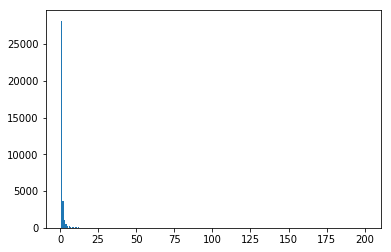

In [172]:
plt.bar(range(1, len(dfFre) + 1), dfFre)
plt.show()

  &nbsp;&nbsp;We are going to filter those terms which weighting are less than 60,which menas the maximum document frequency will be 0.46.So we set the max_df to 0.46 and it will eliminate those terms which are disregarded by us.  
  &nbsp;&nbsp;From bar graph below we can clearly find the that there are more than 25000 terms which only appeared in one document,so it is impossile to delete all these items for accuracy.So we set the minimum document frequency to 1.  
   &nbsp;&nbsp;We will also set min_df to 2 because there are still more than 6000 terms, so we can compare the results .However there is no need to set the min_df to 3,because the number of terms are too small to analyse.

In [173]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=1, max_df=0.46)
X_filter = filter_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

34806


In [174]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter)

Wall time: 4.52 s


In [175]:
print('Min_df = 1:')
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())


Min_df = 1:
Top terms for cluster 0: test, wicket, ball, cricket, pakistan, 
Top terms for cluster 1: williams, wale, get, half, injury, 
Top terms for cluster 2: england, ireland, kick, goal, referee, 
Top terms for cluster 3: race, athens, world, athletics, marathon, 
Top terms for cluster 4: open, roddick, australian, australian open, moya, 
Top terms for cluster 5: club, player, cup, team, season, 
Top terms for cluster 6: liverpool, real, benitez, chelsea, madrid, 


In [176]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec2 = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.46)
X_filter2 = filter_vec2.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec2.get_feature_names()))

6630


In [177]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter2)

Wall time: 1.9 s


In [178]:
print('Min_df = 2:')
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec2.get_feature_names())

Min_df = 2:
Top terms for cluster 0: england, cricket, ball, south, test, 
Top terms for cluster 1: moya, beat, davis, davis cup, agassi, 
Top terms for cluster 2: open, williams, grand slam, australian, slam, 
Top terms for cluster 3: club, player, want, chelsea, manager, 
Top terms for cluster 4: world, race, indoor, olympic, athletics, 
Top terms for cluster 5: drug, ban, greek, iaaf, test, 
Top terms for cluster 6: roddick, hewitt, shot, set, break, 


## 6. What is the number of input features available to execute clustering? (Hint: how the original text data is converted into a feature set that can be mined for knowledge discovery?)

From the previous research,we can find that there are 34806 input features available to execute clustering when the min_df = 1,there are 6630 input feature available when the min_df = 2,so we cluster these two sets sepatately to figure out which one is significantly better.  
Then Singular value decomposition (SVD) is used to reduce the number of terms while preserving the similarity structure among documents

In [188]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

In [189]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 england, open, world, first, get, 
Top terms in component #1 open, roddick, australian open, moya, australian, 
Top terms in component #2 wicket, open, australia, pakistan, inning, 
Top terms in component #3 world, athens, test, chepkemei, athletics, 
Top terms in component #4 roddick, moya, spain, davis cup, davis, 
Top terms in component #5 ferguson, chelsea, club, arsenal, liverpool, 
Top terms in component #6 idowu, edward, jump, indoor, triple, 
Top terms in component #7 club, kafer, saracen, season, steve, 
Top terms in component #8 idowu, edward, triple, jump, aragones, 
Top terms in component #9 aragones, spain, racism, henry, comment, 


In [190]:
%%time
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

Wall time: 91.8 ms


In [191]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster 0: cricket, test, england, day, arsenal, 
Top terms for cluster 1: clijsters, wrist, open, entry, dokic, 
Top terms for cluster 2: cross country, chepkemei, marathon, country, cross, 
Top terms for cluster 3: liverpool, club, real, want, beckham, 
Top terms for cluster 4: open, world, australian, australian open, champion, 
Top terms for cluster 5: england, wale, ireland, nation, six nation, 
Top terms for cluster 6: roddick, moya, nadal, davis, davis cup, 


### When min_df = 2 :

In [192]:
X_trans2 = svd.fit_transform(X_filter2)

In [193]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms2 = filter_vec2.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms2[i], end=", ")
    print()

Top terms in component #0 england, open, world, get, player, 
Top terms in component #1 open, roddick, australian, australian open, moya, 
Top terms in component #2 athens, athletics, race, marathon, chepkemei, 
Top terms in component #3 test, wicket, pakistan, ball, run, 
Top terms in component #4 ireland, wale, england, nation, six nation, 
Top terms in component #5 greek, drug, kenteris, iaaf, thanou, 
Top terms in component #6 arsenal, chelsea, henry, shot, ferguson, 
Top terms in component #7 roddick, moya, davis, davis cup, spain, 
Top terms in component #8 chepkemei, marathon, cross country, radcliffe, cross, 
Top terms in component #9 pakistan, moya, australia, cup, davis cup, 


In [194]:
%%time
svd_kmeans2 = KMeans(n_clusters=7, random_state=rs).fit(X_trans2)

Wall time: 114 ms


In [196]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans2.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans2.n_clusters, original_space_centroids, filter_vec2.get_feature_names())

Top terms for cluster 0: arsenal, chelsea, henry, wenger, mourinho, 
Top terms for cluster 1: drug, collins, balco, ban, pound, 
Top terms for cluster 2: ball, wicket, vaughan, run, strauss, 
Top terms for cluster 3: cricket, team, world, new, athletics, 
Top terms for cluster 4: england, wale, nation, six nation, six, 
Top terms for cluster 5: open, roddick, australian, australian open, hewitt, 
Top terms for cluster 6: liverpool, club, £, want, souness, 


## 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

From the two previous outcome,we can find the result which min_df = 1 is significantly better than the result when min_df = 2,So we choose the first as our final result. 

Therea are 7 clusters finally

* Top terms for cluster 0: cricket, test, england, day, arsenal,
* Top terms for cluster 1: clijsters, wrist, open, entry, dokic, 
* Top terms for cluster 2: cross country, chepkemei, marathon, country, cross, 
* Top terms for cluster 3: liverpool, club, real, want, beckham, 
* Top terms for cluster 4: open, world, australian, australian open, champion, 
* Top terms for cluster 5: england, wale, ireland, nation, six nation, 
* Top terms for cluster 6: roddick, moya, nadal, davis, davis cup,

### Explaination
* Cluster 0: Arsenal take a cricket test in england
* Cluster 1: Clijsters and dokic wristwith each other in a game
* Cluster 2: Cheplemei joined a cross country marathon 
* Cluster 3: Club liverpool really wants Beckham
* Cluster 4: Australian wins open world champion
* Cluster 5: Six nation together which includes england wales,ireland etc..
* Cluster 6: Nadal,roddick,moya joined davis cup

## 8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in the start list?

As mentioned before,we chooes terms which term weighting are larger than 60,so we 

In [225]:
for i, term in enumerate(terms):
    if i < 50 and term['tf']*math.log(200/term['df'],10)>60:
        print(str(i + 1) + "\tTerm:", term['term'], "\tTerm weighting:", 
              (term['tf']*math.log(200/term['df'],10)), "\tTerm Frequency", term['tf'],"\tDocument Frequency", term['df']/200)
    dfFre[term['df'] - 1] += 1

3	Term: game 	Term weighting: 68.65530846940351 	Term Frequency 249 	Document Frequency 0.53
4	Term: win 	Term weighting: 71.93773667990764 	Term Frequency 246 	Document Frequency 0.51
5	Term: play 	Term weighting: 68.1591975276482 	Term Frequency 240 	Document Frequency 0.52
9	Term: england 	Term weighting: 116.42030375380722 	Term Frequency 199 	Document Frequency 0.26
12	Term: first 	Term weighting: 65.05339796852765 	Term Frequency 185 	Document Frequency 0.445
13	Term: world 	Term weighting: 60.70359029731665 	Term Frequency 180 	Document Frequency 0.46
14	Term: get 	Term weighting: 63.26438003293846 	Term Frequency 175 	Document Frequency 0.435
15	Term: player 	Term weighting: 63.503447497963364 	Term Frequency 164 	Document Frequency 0.41
20	Term: team 	Term weighting: 62.178951734352715 	Term Frequency 144 	Document Frequency 0.37
23	Term: match 	Term weighting: 63.169040664099576 	Term Frequency 133 	Document Frequency 0.335
24	Term: set 	Term weighting: 62.21913027817327 	Ter

So this terms are in out start list,and the first fifteen high frequent terms are:  
* game 
* win
* play
* england
* first
* world
* get
* player
* team
* match
* set
* day
* open 
* final 
* cup

## 9. Describe how these clusters can be useful in the online personalised news story service planned by the news corporation.

&nbsp;&nbsp;From the result we get from the previous result, the first thing we can find is that nearly all of these articles are about sport.From the terms we find we can also classify those sport into further by terms.For example we can set differnet tags like football,basketball and tennis as a navigation link for those stories.And the name of players can be also tagged as sub navigation link.It will siginicantly improve the user experience.This can be applied to all the news story service website.  
&nbsp;&nbsp;These data sets can also be used in association mining ,for example it can automatically recommend news story based on the users frequently browsed tags.It is a great feature to increse traffic to news story website.  
&nbsp;&nbsp;These frequent items also shows what is the most favourite players and games by users,so the news corporation can have a basic idea for which news should be at the front page of the website. 

# Part 4: Web Mining the Log Data for a Website
## Task 6 Web Mining
### First data mining operation: Association Mining

a. The rationale for selecting the specific operation/method.

Sequence/Association mining was chosen to try to gain a better understanding of users pathways through the various web pages. Usage patterns can help an organisation improve site design by identifying whish pages are commonly viewed in the same sessions.

b. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

For this task we only need to use session and request. Sessions are numbered 1 to 1939, while requests are strings listing the page or file requested by the user.

c. Can you identify data quality issues in order to perform web mining?

The one main quality problem for this exercise was the variations in the Request values. As one example, we can see values like '/eaglefarm', '/eaglefarm/', and '/eaglefarm.html'. Without knowing the website structue intimately, we cannot be sure whether these are the same requests or not.
For our purposes here, we have assumed that values without a file extension, and values ending with a slash (/) are the same. Values with file extensions can be left separate for now.
We handled this by removing the slash (/) if the value ended with it, making them the same as other requests, so '/eaglefarm/' becomes '/eaglefarm'.

d. Discuss the results obtained. Discuss also the applicability of findings of the method. Should include a high-level managerial kind of discussion on the findings, should not be just interpretation of results as shown in the results panel.

We can see that most results with enough support are around the '/eaglefarm' part of the site, which we could have predicted from the initial data exploration (value_counts). There are a couple exceptions, namely '/services.html' and '/robots.txt'.
Sorting by confidence shows us those with the highest probability of the user making the request on the right side, given that they also request the left side in the same session.
Some of those results include /eaglefarm, /eaglefarm/javascript/menu.js, /eaglefarm/pricelist, and /eaglefarm/pdf/Web_Price_List.pdf.
From the high confidence of these top results, it shows that many of the site's visitors are there to get the PDF document at '/eaglefarm/pdf/Web_Price_List.pdf' but their navigation path may take several steps.

I would recommend a review of the site pathways (user experience stories) leading to this PDF document. The decision makers may want to either:
a) place some more targeted advertisments on these pathways leading to the document, which could lead users to other offerings or increased revenue. 
b) place a link to this PDF document on the home page so users can get to it with less clicks, improving the user experience.

In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori

#define function to print apriori results neatly
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

# load the dataset
df = pd.read_csv('database/web_log_data.csv')
# random state
rs = 42
# explore the dataset
df.info()
df.head()

In [ ]:
df.request.value_counts()

In [ ]:
#remove the ending / for values so that '/eaglefarm/' and '/eaglefarm' are treated as the same
df['request'] = df['request'].str.replace(r'/$', '', regex=True)
df.request.value_counts()

In [ ]:
# sort the rows based on date_time, descending
df.sort_values(by='date_time', inplace=True)
#group by sessions and list requested resources
sessions = df.groupby(['session'])['request'].apply(list)
# type cast the sessions from pandas into normal list format
session_list = list(sessions)
# run apriori with minimum support or 7.5%
results = list(apriori(session_list, min_support=0.075))
# sort results by confidence and print top 30
result_df = convert_apriori_results_to_pandas_df(results)
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(30))

# Second data mining operation: Clustering

a. The rationale for selecting the specific operation/method.

Clustering users can help identify groups of users by their activity on the site. Once clusters are established, you can learn more about the distribution of users visiting your site and create targeted advertisments or focus more or less new content to particular user groups.

b. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

For this task we only need to use user_id and request. Users are numbered 1 to 1939, while requests are strings listing the page or file requested by the user.

c. Can you identify data quality issues in order to perform web mining?

As before, we will remove the slash (/) if the request value ended with it, making them the same as other requests, so '/eaglefarm/' becomes '/eaglefarm'.
Since this is an object type column we will also 'one hot' encode to create binary values.
A seperate issue was discovered where user_id matched exactly to session. This indicates that individual users were actually not identified (for lack of information or other reasons), so that each individual sessions is considered a separate user. We could have grouped the sessions by the ip column and assumed that sessions from the same ip are the one user, but this is also not a recommended approach. So for now, we have left this attribute as is.

d. Discuss the results obtained. Discuss also the applicability of findings of the method. Should include a high-level managerial kind of discussion on the findings, should not be just interpretation of results as shown in the results panel.

We can see from the final cluster sizes and data points closest to the cluster centres that the user grouping is not so much different from what we might have expected to see from the initial data exploration. There is a significant group oif users that only visit the site to get '/robots.txt' and another group that doesn't make it past the home/index page.
The remaining groups are all pulled towards the 'eaglefarm' domain, are are separated by whther they are retrieving pricing lists or contact information.
Now we've sorted this set of visitors into user groups, we can discuss how better to target them with messaging or advertisements, whether it be to expose them to other parts of the site, or to focus efforts into increasing the content or value of these parts of the site.

In [ ]:
# load the dataset
df = pd.read_csv('database/web_log_data.csv')
# random state
rs = 42
# as before, remove the ending / for values so that '/eaglefarm/' and '/eaglefarm' are treated as the same
df['request'] = df['request'].str.replace(r'/$', '', regex=True)
# drop attributes we don't need
df = df.drop(['ip', 'date_time', 'step', 'session'],axis=1)
# group by user_id
df_group = df.groupby(['user_id'])['request'].apply(list)
# explore the dataset
df_group.head()

In [ ]:
# convert the list into binary dataframe (one hot encoding)
df_grouped = pd.get_dummies(df_group.apply(pd.Series),prefix='request')
df_grouped.info()
df_grouped.head()

In [ ]:
# find optimal number of clusters
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

X = df_grouped.as_matrix()

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [ ]:
# we've chosen 6 as the number of clusters
model = KMeans(n_clusters=6, random_state=rs).fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

In [ ]:
y = model.predict(X)
df_grouped['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df_grouped['Cluster_ID'].value_counts())

In [ ]:
# show index of data points closest to the cluster centroids
closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, X)
closest

In [ ]:
# print closest points (index + 1) for each cluster
print(df_group[98])
print(df_group[108])
print(df_group[15])
print(df_group[1])
print(df_group[79])
print(df_group[238])